# Gender Classification through Voice Data

### Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the DataSet

In [3]:
df=pd.read_csv("D:\\SK miniproject\\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Exploratory Data Analysis

In [4]:
df.shape

(3168, 21)

In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

##  Handling Null values

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### There are no null values to handle

## Plotting percentage distribution of label on a pie chart

In [8]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

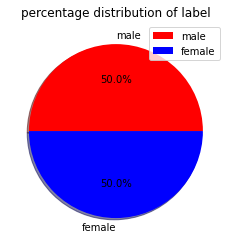

In [9]:
labels= ['male','female']
colors= ['r','b']
gender='1584','1584'

plt.pie(gender,labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend()
plt.title('percentage distribution of label')

plt.show()


## One Hot Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])

In [12]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

##  Spliting the Dataset into training and testing data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [15]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

In [18]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.20)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


##  Applying the classifier models on training dataset and generating predictions for the            test dataset


#### a. DECISIONTREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
m1= DecisionTreeClassifier()
m1.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [21]:
print('training Score',m1.score(x_tr,y_tr))
print('testing Score',m1.score(x_te,y_te))
ypred_m1=m1.predict(x_te)
print(ypred_m1)

training Score 1.0
testing Score 0.9558359621451105
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1

#### b. RANDOMFOREST CLASSIFIER

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
m2= RandomForestClassifier()
m2.fit(x_tr,y_tr)

RandomForestClassifier()

In [24]:
print('training Score',m2.score(x_tr,y_tr))
print('testing Score',m2.score(x_te,y_te))
ypred_m2=m2.predict(x_te)
print(ypred_m2)

training Score 1.0
testing Score 0.9763406940063092
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1

#### c. KNN CLASSIFIER

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
m3=KNeighborsClassifier(n_neighbors=13)
m3.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=13)

In [27]:
print('training Score',m3.score(x_tr,y_tr))
print('testing Score',m3.score(x_te,y_te))
ypred_m3=m3.predict(x_te)
print(ypred_m3)

training Score 0.7434885556432518
testing Score 0.7192429022082019
[0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 

#### d. LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
m4=LogisticRegression()
m4.fit(x_tr,y_tr)

C:\Users\heman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print('training Score',m4.score(x_tr,y_tr))
print('testing Score',m4.score(x_te,y_te))
ypred_m4=m4.predict(x_te)
print(ypred_m4)

training Score 0.8993685872138911
testing Score 0.889589905362776
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1

#### e. SVM CLASSIFIER

In [31]:
from sklearn.svm import SVC

In [32]:
m5=SVC(kernel='linear',C=10)
m5.fit(x_tr,y_tr)

SVC(C=10, kernel='linear')

In [33]:
print('training Score',m5.score(x_tr,y_tr))
print('testing Score',m5.score(x_te,y_te))
ypred_m5=m5.predict(x_te)
print(ypred_m5)

training Score 0.9727703235990529
testing Score 0.9652996845425867
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 

##  CONFUSION_METRIX AND CLASSIFICATION_REPORT

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#### a. Decision Tree Classifier 

In [35]:
cm_m1=confusion_matrix(y_te,ypred_m1)
print(cm_m1)
print(classification_report(y_te,ypred_m1))

[[304  12]
 [ 16 302]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       316
           1       0.96      0.95      0.96       318

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



#### b. Random Forest Classifier 

In [36]:
cm_m2=confusion_matrix(y_te,ypred_m2)
print(cm_m2)
print(classification_report(y_te,ypred_m2))

[[312   4]
 [ 11 307]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       316
           1       0.99      0.97      0.98       318

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### c. KNN Classifier 

In [37]:
cm_m3=confusion_matrix(y_te,ypred_m3)
print(cm_m3)
print(classification_report(y_te,ypred_m3))

[[211 105]
 [ 73 245]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       316
           1       0.70      0.77      0.73       318

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634



#### d. Logistic Regression 

In [38]:
cm_m4=confusion_matrix(y_te,ypred_m4)
print(cm_m4)
print(classification_report(y_te,ypred_m4))

[[265  51]
 [ 19 299]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       316
           1       0.85      0.94      0.90       318

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



#### e. SVM Classifier 

In [39]:
cm_m5=confusion_matrix(y_te,ypred_m5)
print(cm_m5)
print(classification_report(y_te,ypred_m5))

[[305  11]
 [ 11 307]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       316
           1       0.97      0.97      0.97       318

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



##  Accuracies of all the models

a) Decision Tree Classifier  - 0.954<br>
b) Random Forest Classifier  - 0.974<br>
c) KNN Classifier            - 0.728<br>
d) Logistic Regression       - 0.891<br>
e) SVM Classifier            - 0.965

#### Therefore the RandomForest Classifier Model is having the best accuracy